In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import cross_validate

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['target'] = 'fake'
true['target'] = 'true'

In [4]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['target'] = 'fake'
true['target'] = 'true'

data = pd.concat([fake, true]).reset_index(drop = True)

In [5]:
#4.1
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

fake['target'] = 'fake'
true['target'] = 'true'

data = pd.concat([fake, true]).reset_index(drop = True)

from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [6]:
data.drop(["date"],axis=1,inplace=True)

In [7]:
data.drop(["date"],axis=1,inplace=True)

data.drop(["title"],axis=1,inplace=True)

In [8]:
#4，2
data.drop(["date"],axis=1,inplace=True)

data.drop(["title"],axis=1,inplace=True)

data['text'] = data['text'].apply(lambda x: x.lower())

In [9]:
#4.2
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [10]:
#4.2
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


nltk库找不到 11-14是解决方法

In [11]:
import nltk
print(nltk.data.path)

['C:\\Users\\86135/nltk_data', 'D:\\Download\\Anaconda\\nltk_data', 'D:\\Download\\Anaconda\\share\\nltk_data', 'D:\\Download\\Anaconda\\lib\\nltk_data', 'C:\\Users\\86135\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [12]:
import nltk
print(nltk.data.path)

import nltk
print(nltk.data.find('corpora/stopwords.zip'))

C:\Users\86135\AppData\Roaming\nltk_data\corpora\stopwords.zip


In [13]:
import nltk
print(nltk.data.path)

import nltk
print(nltk.data.find('corpora/stopwords.zip'))

from nltk.corpus import stopwords
stop = stopwords.words('english')

In [14]:
import nltk
print(nltk.data.path)

import nltk
print(nltk.data.find('corpora/stopwords.zip'))

from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

数据探索

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


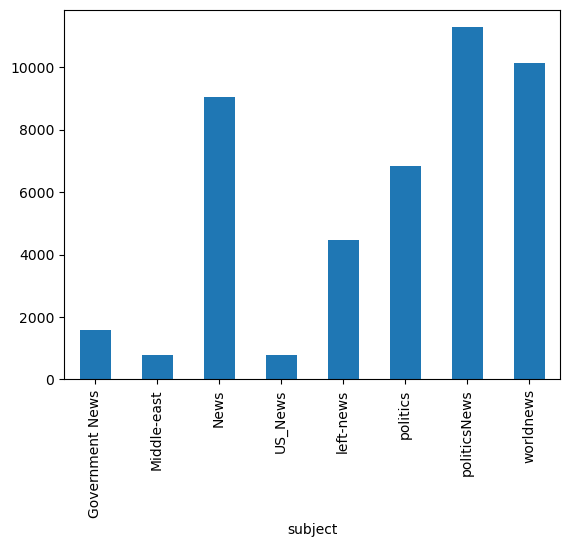

In [15]:
#5.1
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


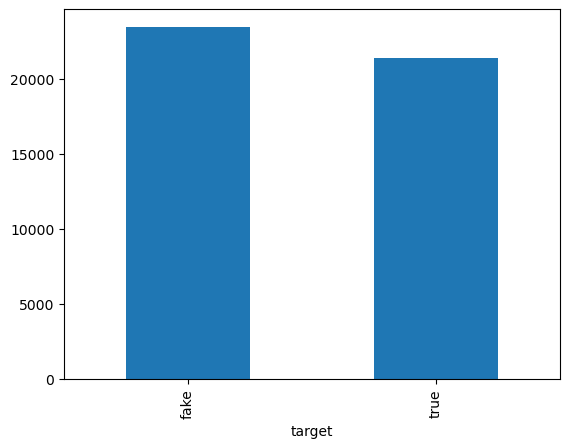

In [16]:
#5.1
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

In [17]:
#pip install wordcloud

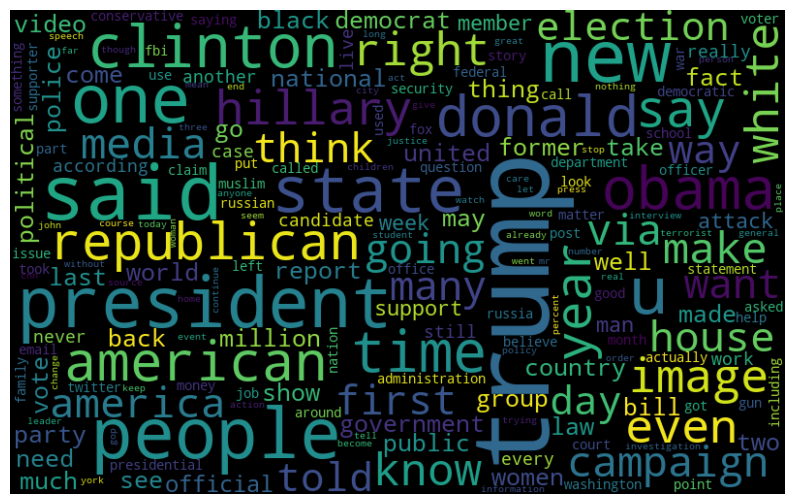

In [18]:
#5.1 假新闻
from wordcloud import WordCloud
fake_data = data[data['target'] == 'fake']
all_words = ' '.join(text for text in fake_data['text'] if isinstance(text, str))
wordcloud = WordCloud(width=800, height=500,
                     max_font_size=110,
                     collocations=False).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

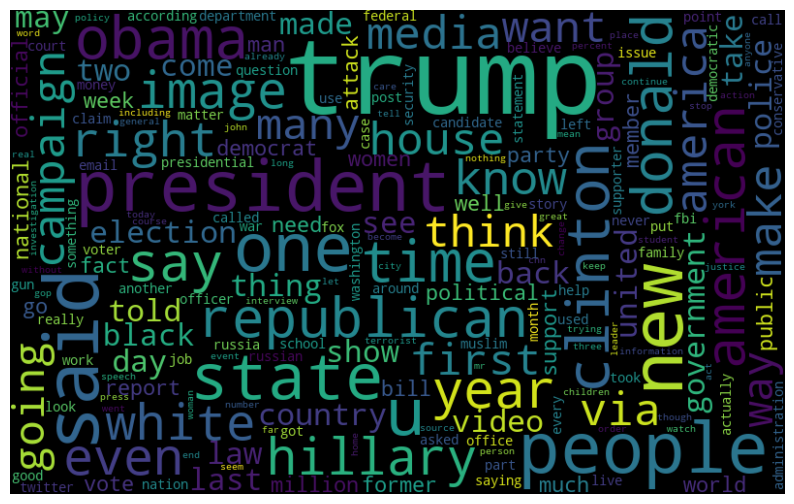

In [19]:
#真新闻
from wordcloud import WordCloud
real_data = data[data['target'] == 'true']
all_words = ' '.join(text for text in fake_data['text'] if isinstance(text, str))
wordcloud = WordCloud(width= 800, height= 500, 
                      max_font_size = 110,
                      collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

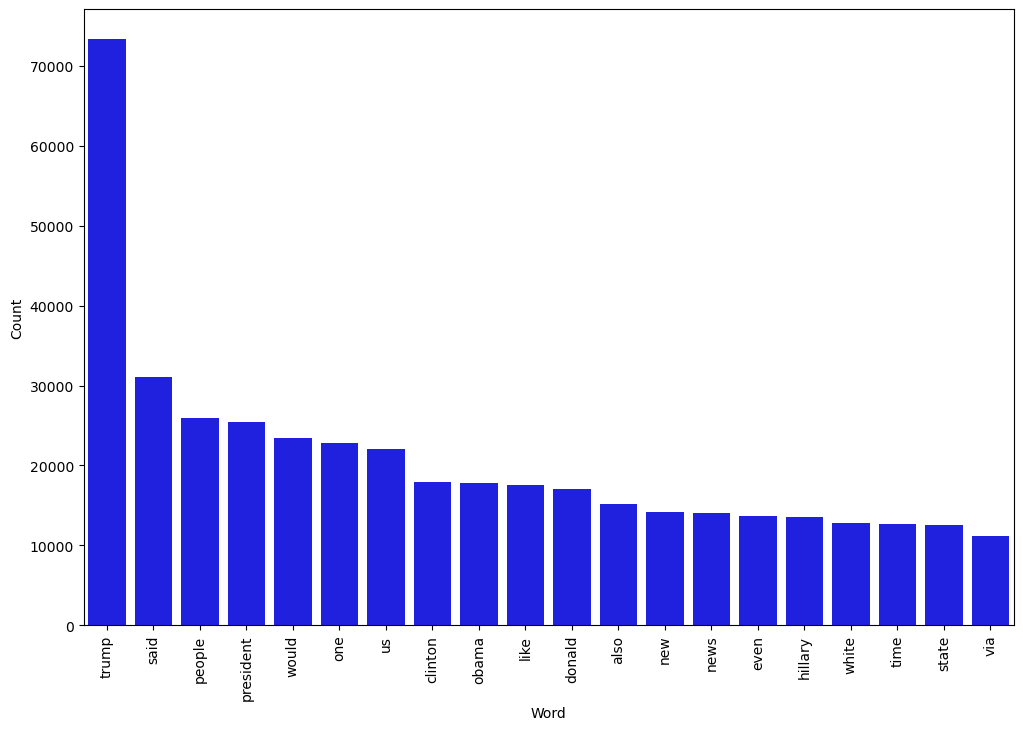

In [21]:
#频率最高
counter(data[data["target"] == "fake"], "text", 20)

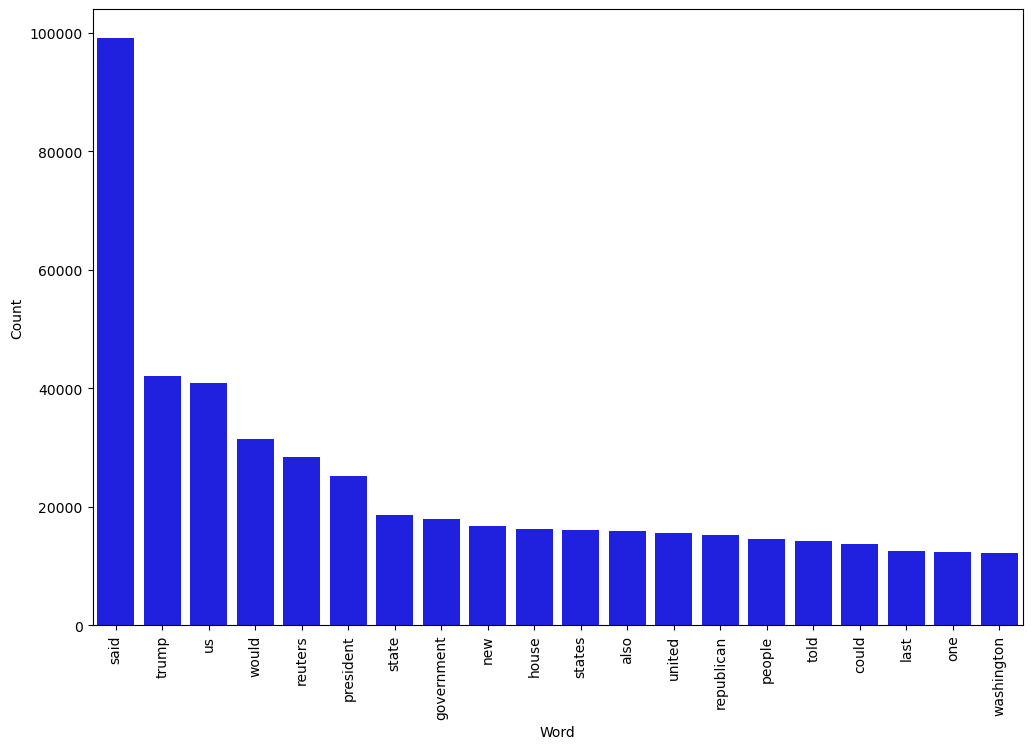

In [22]:
#真新闻
counter(data[data["target"] == "true"], "text", 20)

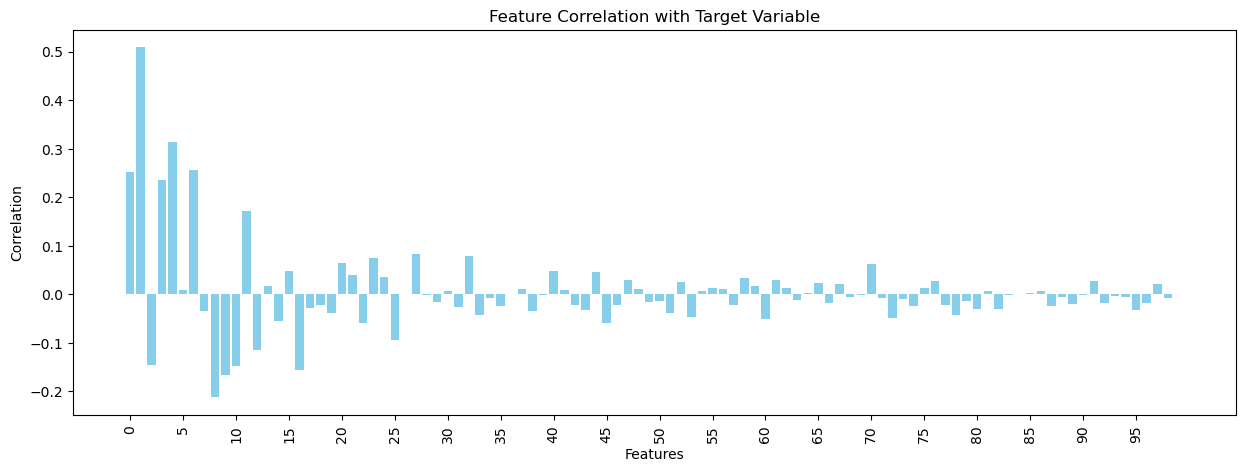

In [54]:
#5.2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder

# int
le = LabelEncoder()
y_target_encoded = le.fit_transform(data['target'].values)

svd = TruncatedSVD(n_components=100)
X_tfidf_reduced = svd.fit_transform(X_tfidf)

# correlation
correlation_matrix = []
for i in range(X_tfidf_reduced.shape[1]):  
    corr = np.corrcoef(X_tfidf_reduced[:, i], y_target_encoded)[0, 1]
    correlation_matrix.append(corr)

# visualization
plt.figure(figsize=(15, 5))  
plt.bar(np.arange(len(correlation_matrix)), correlation_matrix, color='skyblue')
plt.title('Feature Correlation with Target Variable')  
plt.xlabel('Features')  
plt.ylabel('Correlation')  
plt.xticks(np.arange(0, 100, step=5), rotation=90)  
plt.show()


建模

In [23]:
#7.2
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [24]:
#第六章开头
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

逻辑回归

In [ ]:
#6.1
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Vectorizing and applying TF-IDF
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

# Fitting the model
model = pipe.fit(X_train, y_train)

In [25]:
#7.1.1
# Making predictions
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))

accuracy: 98.96%


Confusion matrix, without normalization


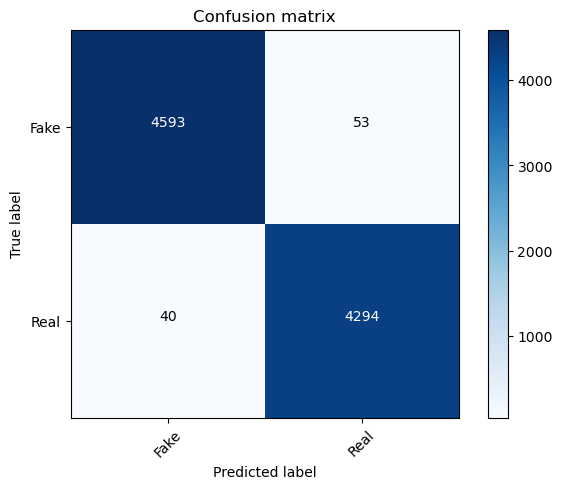

In [26]:
#7.2
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [31]:
#7.1.3 7.1.2 7.3
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")

print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

# 假设 'fake' 是正类
pos_label = 'fake'

# 计算召回率时指定正确的正类标签
recall = recall_score(y_test, prediction, pos_label='fake')
print(f"Recall: {recall:.5f}")

# 计算F1分数时指定正确的正类标签
f1 = f1_score(y_test, prediction, pos_label='fake')
print(f"F1 score: {f1:.5f}")


Cross-validation scores for Logistic Regression: [0.98788976 0.98775056 0.98747216 0.98802729 0.98858416]
Mean CV score: 0.9879447831693676
Standard deviation: 0.0003687085771322631
Recall: 0.98859
F1 score: 0.98998


决策树

In [32]:
#6.2
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))


accuracy: 99.71%


Confusion matrix, without normalization


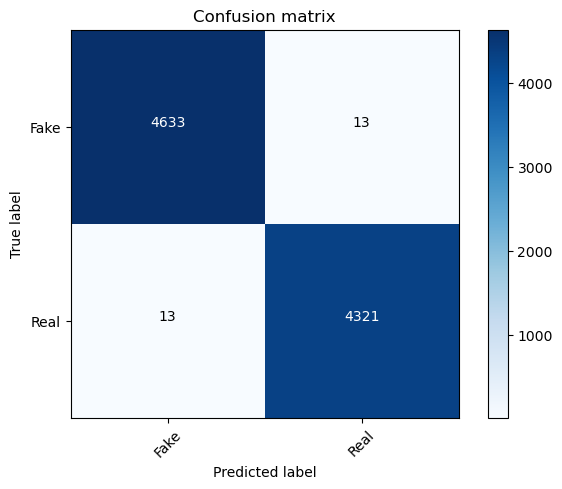

In [33]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [34]:
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')

# 输出交叉验证的分数
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")

# 计算并输出交叉验证分数的平均值和标准差
print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

# 假设 'fake' 是正类
pos_label = 'fake'

# 计算召回率时指定正确的正类标签
recall = recall_score(y_test, prediction, pos_label='fake')
print(f"Recall: {recall:.5f}")

# 计算F1分数时指定正确的正类标签
f1 = f1_score(y_test, prediction, pos_label='fake')
print(f"F1 score: {f1:.5f}")


Cross-validation scores for Logistic Regression: [0.99638085 0.99693764 0.99526726 0.99610191 0.99665878]
Mean CV score: 0.9962692862106056
Standard deviation: 0.0005732217797808658
Recall: 0.99720
F1 score: 0.99720


随机森林

In [35]:
#6.3
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

# Pipeline
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', RandomForestClassifier(n_estimators=50, criterion='entropy'))  # 注意这里使用了单引号
])

model = pipe.fit(X_train, y_train)

prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction) * 100, 2)))

accuracy: 99.15%


Confusion matrix, without normalization


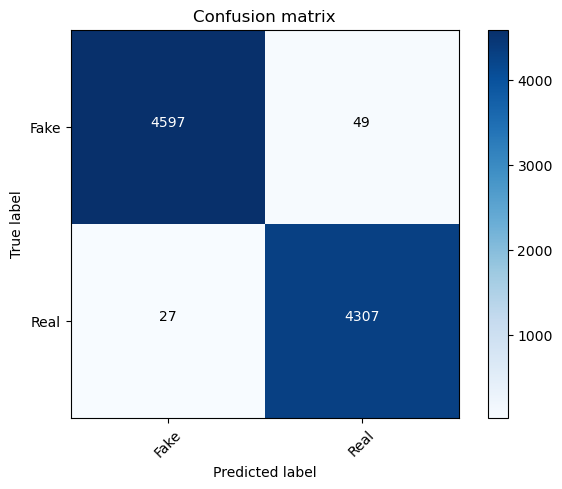

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


In [37]:
cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')

# 输出交叉验证的分数
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")

# 计算并输出交叉验证分数的平均值和标准差
print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

# 假设 'fake' 是正类
pos_label = 'fake'

# 计算召回率时指定正确的正类标签
recall = recall_score(y_test, prediction, pos_label='fake')
print(f"Recall: {recall:.5f}")

# 计算F1分数时指定正确的正类标签
f1 = f1_score(y_test, prediction, pos_label='fake')
print(f"F1 score: {f1:.5f}")


Cross-validation scores for Logistic Regression: [0.9922049  0.98691537 0.99011693 0.99081164 0.98774885]
Mean CV score: 0.9895595367619723
Standard deviation: 0.001956864852406666
Recall: 0.98945
F1 score: 0.99180


In [30]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')

# 输出交叉验证的分数
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")

# 计算并输出交叉验证分数的平均值和标准差
print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

Cross-validation scores for Logistic Regression: [0.98802895 0.98594098 0.98747216 0.98635668 0.98858416]
Mean CV score: 0.9872765852124866
Standard deviation: 0.000994396968899073


支持向量机

In [38]:
#6.4
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Support Vector Machine (SVM) model
svm_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', SVC(kernel='linear'))  
])

# Fit the SVM model
svm_model = svm_pipe.fit(X_train, y_train)

# Make predictions with the SVM model
svm_prediction = svm_model.predict(X_test)

SVM Accuracy: 99.49889%
Confusion matrix, without normalization
Cross-validation scores for Logistic Regression: [0.99011693 0.9846882  0.98997773 0.99011555 0.98886259]
Mean CV score: 0.988752198723353
Standard deviation: 0.002085734302803439
Recall: 0.99397
F1 score: 0.99515


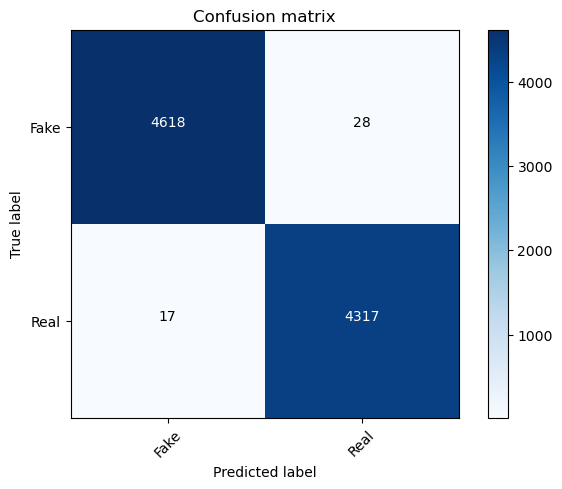

In [39]:
svm_accuracy = accuracy_score(y_test, svm_prediction)
print(f"SVM Accuracy: {svm_accuracy * 100:.5f}%")
cm = metrics.confusion_matrix(y_test, svm_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy')

# 输出交叉验证的分数
print(f"Cross-validation scores for Logistic Regression: {cv_scores}")

# 计算并输出交叉验证分数的平均值和标准差
print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

# 假设 'fake' 是正类
pos_label = 'fake'

# 计算召回率时指定正确的正类标签
recall = recall_score(y_test, y_pred, pos_label= 'fake')
print(f"Recall: {recall:.5f}")

# 计算F1分数时指定正确的正类标签
f1 = f1_score(y_test, y_pred, pos_label=pos_label)
print(f"F1 score: {f1:.5f}")

XGBOOST

In [41]:
#6.5
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# XGBoost model
xgb_pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # XGBoost parameters
])

# Fit the XGBoost model
xgb_model = xgb_pipe.fit(X_train, y_train_encoded)

# Make predictions with the XGBoost model
xgb_prediction = xgb_model.predict(X_test)

#将预测结果转换回原始标签
y_pred_original = le.inverse_transform(xgb_prediction)


准确率: 99.81%
召回率: 1.00
F1分数: 1.00


XGBoost Accuracy: 99.81069%
Confusion matrix, without normalization
Cross-validation scores for XGBoost: [0.99638085 0.99777283 0.99735523 0.99791174 0.99735487]
Mean CV score: 0.9973551020768847
Standard deviation: 0.0005354458117895656
Recall: 0.99742
F1 score: 0.99817


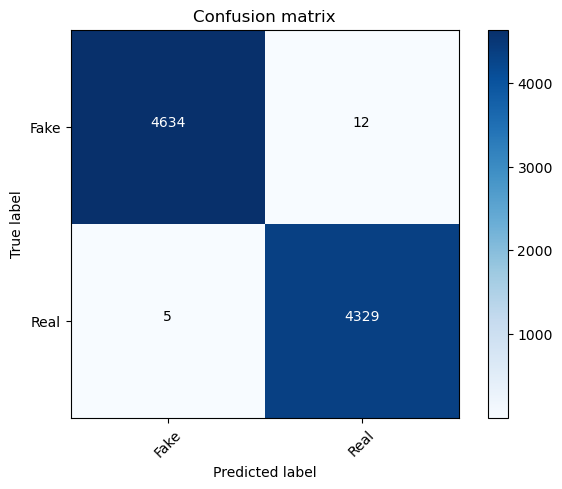

In [44]:

# Calculate the accuracy, recall, and F1 score using the encoded labels
xgb_accuracy = accuracy_score(y_test_encoded, xgb_prediction)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.5f}%")

# plot_confusion_matrix(cm, classes=[0, 1])  # Uncomment this line to plot the confusion matrix
cm = metrics.confusion_matrix(y_test_encoded, xgb_prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
# Perform 5-fold cross-validation and print the cross-validation scores for the XGBoost model
cv_scores = cross_val_score(xgb_pipe, X_train, y_train_encoded, cv=5, scoring='accuracy')
print(f"Cross-validation scores for XGBoost: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")
print(f"Standard deviation: {cv_scores.std()}")

# Calculate recall and F1 score with the original string labels
# First, convert predictions back to original labels
y_pred_original = le.inverse_transform(xgb_prediction)
recall = recall_score(y_test, y_pred_original, pos_label='fake')
print(f"Recall: {recall:.5f}")

f1 = f1_score(y_test, y_pred_original, pos_label='fake')
print(f"F1 score: {f1:.5f}")